# Demo1: Simple Harmonic Oscillator

In this jupyter notebook, we will learn how to use the Euler's method to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
x^{t^{n+1}} = x^{t^n} + v^{t^n} \times \Delta t,
$$
and 
$$
v^{t^{n+1}} = v^{t^n} + a^{t^n} \times \Delta t.
$$

### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: 
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the Euler method
#

A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt = 0.01

def solve_shm_euler(y, dt=0.01, tmax=20, A=1, k=1, m=1):
    omega0 = np.sqrt(k/m)
    times = np.linspace(0,tmax,int(tmax/dt)+1,endpoint=True)
    positions = np.zeros(len(times))
    velocities = np.zeros(len(times))    

    # set the initial conditions
    positions[0] = y[0]
    velocities[0] = y[1]

    # solve the difference equation using the Euler method
    for n in np.arange(1, len(times)):
        
        def f(y):
            return np.array([y[1], -omega0**2 * y[0]])
        y = y + dt*f(y) # Euler method

        # store the solution
        positions[n] = y[0]
        velocities[n] = y[1]

    return times, positions, velocities




In [39]:
y = np.array([1, 0])
time, posx, velx = solve_shm_euler(y, dt=0.01, tmax=20, A=1, k=1, m=1)

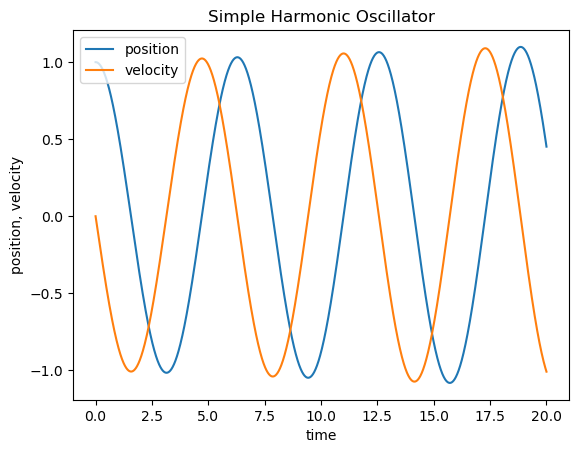

In [40]:
# Step 5: plot the solution

#TODO
plt.figure()
plt.plot(time, posx, label='position')
plt.plot(time, velx, label='velocity')
plt.xlabel('time')
plt.ylabel('position, velocity')
plt.title('Simple Harmonic Oscillator')
plt.legend()






We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

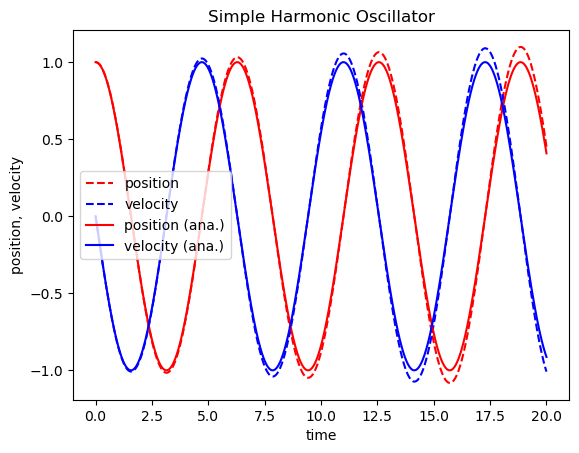

In [41]:
# Step 6: evaluate the analytical solution and plot it
omega0 = np.sqrt(1/1)
posx_ana =  np.cos(omega0*time)
velx_ana = -np.sin(omega0*time)

plt.figure(2)
plt.plot(time, posx,'r--', label='position')
plt.plot(time, velx,'b--', label='velocity')
plt.plot(time, posx_ana,'r-', label='position (ana.)')
plt.plot(time, velx_ana,'b-', label='velocity (ana.)')
plt.xlabel('time')
plt.ylabel('position, velocity')
plt.title('Simple Harmonic Oscillator')
plt.legend()



Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


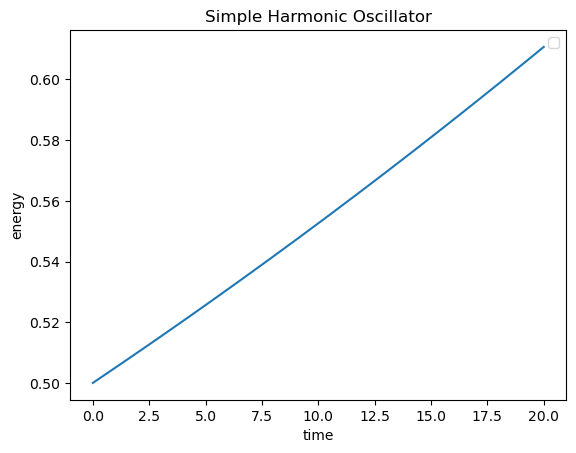

In [29]:
# Step 7: evaluate the energy (error) of the system

# TODO 
etot = 0.5 * (posx**2 + velx**2)
plt.figure(3)
plt.plot(time, etot)
plt.xlabel('time')
plt.ylabel('energy')
plt.title('Simple Harmonic Oscillator')
plt.legend()






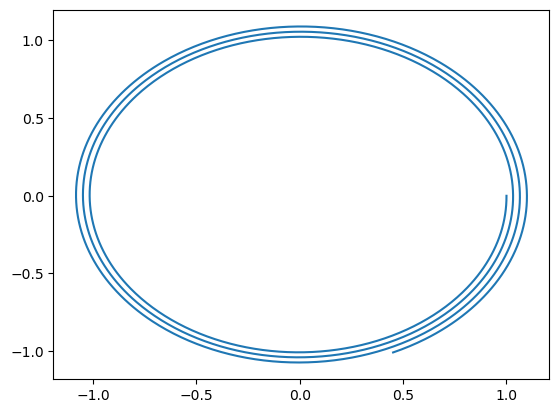

In [30]:
# Step 8: evaluate the phase space

# TODO
plt.figure(4)
plt.plot(posx, velx)










## Exercise 2: 
Check if the accuracy can be improved by reducing the time step to $\Delta t=0.001$.

In [36]:
y = np.array([1, 0])
time2, posx2, velx2 = solve_shm_euler(y, dt=0.001, tmax=20, A=1, k=1, m=1)


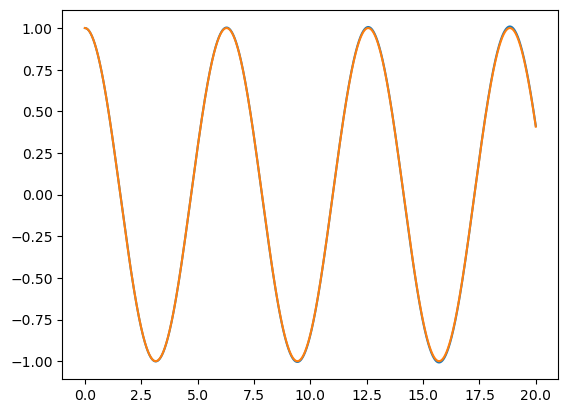

In [37]:
plt.figure(5)
plt.plot(time2, posx2, label='position')
plt.plot(time, posx_ana, label='velocity')

### Note

Reducing the time step is not the best solution. The better solution is to use higher-order schemes. Do NOT use Eulter's method in any production runs. 